# Explore here

# 📝 Instrucciones

- Sistema de predicción de ventas
Queremos establecer el almacén de nuestra empresa en otra localización y necesitamos estimar el ritmo de las ventas, que desde la creación de la empresa ha ido en aumento, para los próximos meses, a fin de proveer el espacio que necesitaremos.

In [148]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

from pickle import dump
from sklearn.metrics import mean_squared_error
import numpy as np
from pmdarima import auto_arima

from pickle import dump
from statsmodels.graphics.tsaplots import plot_acf


# Paso 1 - Carga de datos y Visualización Inicial. 

In [149]:
df = pd.read_csv("https://breathecode.herokuapp.com/asset/internal-link?id=2546&path=sales.csv")
df.head(10)

,date,sales
0,2022-09-03 17:10:08.079328,55.292157
1,2022-09-04 17:10:08.079328,53.803211
2,2022-09-05 17:10:08.079328,58.141693
3,2022-09-06 17:10:08.079328,64.530899
4,2022-09-07 17:10:08.079328,66.013633
5,2022-09-08 17:10:08.079328,60.081865
6,2022-09-09 17:10:08.079328,68.466704
7,2022-09-10 17:10:08.079328,67.765106
8,2022-09-11 17:10:08.079328,70.512261
9,2022-09-12 17:10:08.079328,74.656453


In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    366 non-null    object 
 1   sales   366 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.8+ KB


In [151]:
df['date'] = pd.to_datetime(df['date'])

data = df.set_index('date')

st = data['sales']

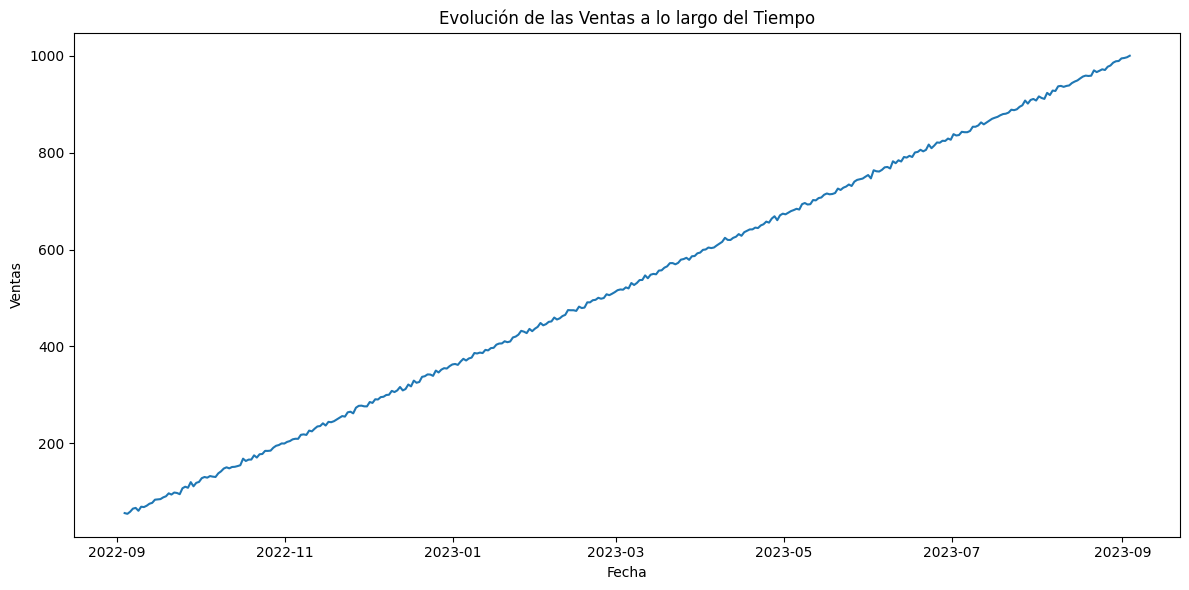

In [152]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=st)
plt.title('Evolución de las Ventas a lo largo del Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.tight_layout()
plt.show()

# Paso 2  - Análisis 
  - Convertiremos la columna date a un formato llamado: "datetime"
  - Seleccionaremos la columna 'sales' como la serie temporal (st)

- ¿Cuál es el tensor de la serie temporal?
  - Los dias ya que es es lo que observamos en que esta siendo evaluado diariamente. 

In [153]:
def test_stacionalidad(timeseries):
    print("Dickey-Fuller test results:")
    dftest = adfuller(timeseries, autolag="AIC")
    dfoutput = pd.Series(dftest[0:4], index=["Test Statistic", "p-value", "#Lags Used", "Number of Observations Used"])
    
    for key, value in dftest[4].items():
        dfoutput["Critical Value (%s)" % key] = value
    return dfoutput

In [154]:
decomposicion = seasonal_decompose(st, period=7)
print(test_stacionalidad(st))

Dickey-Fuller test results:
Test Statistic                   0.545414
p-value                          0.986190
#Lags Used                      13.000000
Number of Observations Used    352.000000
Critical Value (1%)             -3.449065
Critical Value (5%)             -2.869786
Critical Value (10%)            -2.571163
dtype: float64


- Gráficos de descomposición 

- Tendencia 

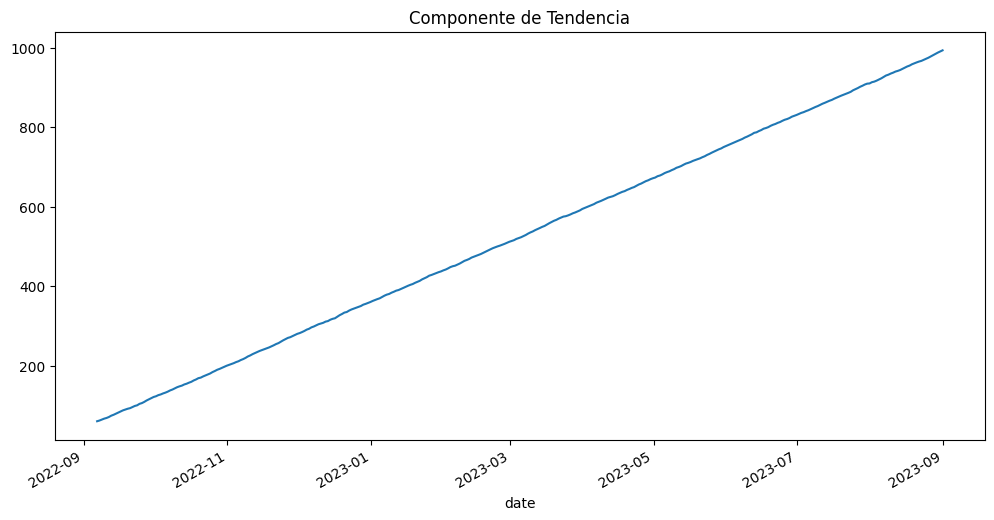

In [155]:
plt.figure(figsize=(12, 6))
decomposicion.trend.plot()
plt.title('Componente de Tendencia')
plt.show()


- ¿Cuál es la tendencia?
  - Es ascendente y lineal ya que se ve que hay un aumento de ventas constantemente.

- Estacionalidad

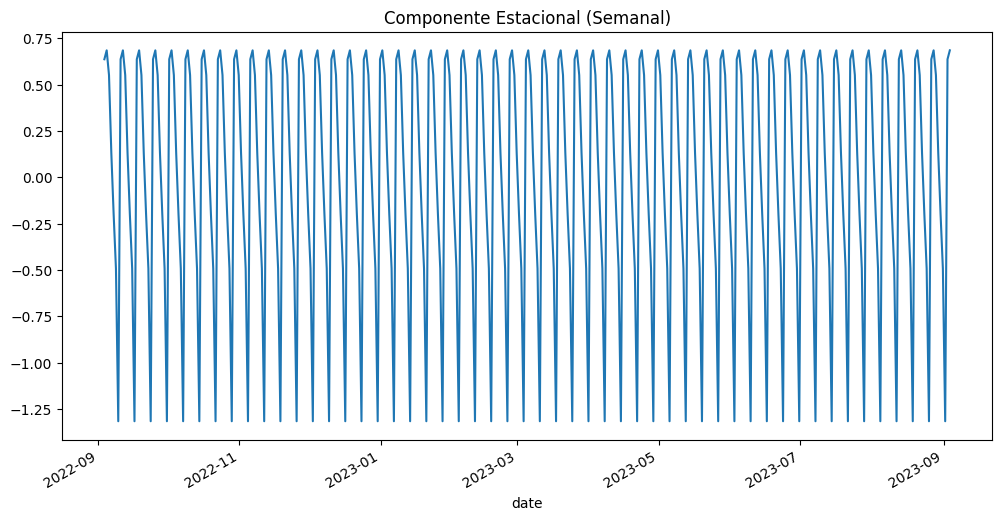

In [156]:

plt.figure(figsize=(12, 6))
decomposicion.seasonal.plot()
plt.title('Componente Estacional (Semanal)')
plt.show()



- ¿Es estacionaria?
  - Se entiende que no es estacionaria ya que va cambiando con el tiempo, esto nos confirma que es necesario aplicar "auto_arima". 

- ¿Existe variabilidad o presencia de ruido?
  - Se puede apreciar que hay poca presencia de ruido (picos de bajadas o subidas) esto se debe a que esta al alza la tendencia de las ventas. 

# 3. Autocorrelación (ACF)

<Figure size 1000x500 with 0 Axes>

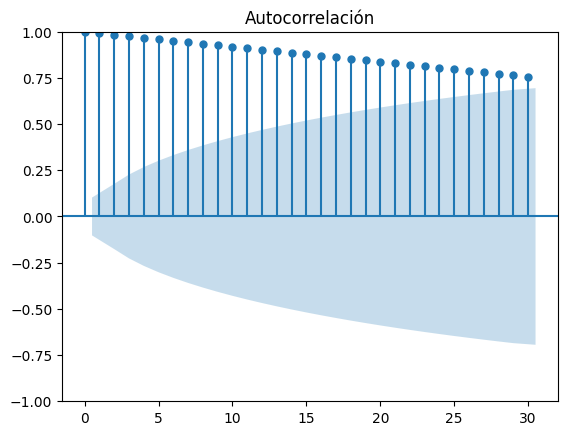

In [157]:

plt.figure(figsize=(10, 5))
plot_acf(st, lags=30)
plt.title('Autocorrelación')
plt.show()

# Paso 3 
 - Entrenamiento de un ARIMA
   - Dividiremos la serie temporal.
   -  indicaremos el tamaño del conjunto de entrenamiento (80%)

In [158]:

tamano_train = int(len(st) * 0.8)


train = st[:tamano_train]  
test = st[tamano_train:]   

- Entrenamiento del Arima 

In [159]:
modelo_arima = auto_arima(
    train,
    seasonal=True,
    m=7,
    suppress_warnings=True,
    stepwise=True,
    error_action='ignore'
)

# Paso 4 - Predicción, Evaluación y Visualización Final

- Predicción del conjunto de datos. 
   - La predición toma el modelo entrenado para generar el pronóstico de ventas. 

In [160]:
n_periodos = len(test)
forecast, conf_int = modelo_arima.predict(n_periods=n_periodos, return_conf_int=True)

In [161]:
forecast = modelo_arima.predict(60)
forecast

2023-06-22 17:10:08.079328    810.092681
2023-06-23 17:10:08.079328    812.129604
2023-06-24 17:10:08.079328    815.533765
2023-06-25 17:10:08.079328    818.346896
2023-06-26 17:10:08.079328    820.695695
2023-06-27 17:10:08.079328    823.023669
2023-06-28 17:10:08.079328    825.261619
2023-06-29 17:10:08.079328    828.085789
2023-06-30 17:10:08.079328    829.977637
2023-07-01 17:10:08.079328    833.520094
2023-07-02 17:10:08.079328    835.659392
2023-07-03 17:10:08.079328    838.799307
2023-07-04 17:10:08.079328    840.339584
2023-07-05 17:10:08.079328    843.251853
2023-07-06 17:10:08.079328    846.039805
2023-07-07 17:10:08.079328    848.949196
2023-07-08 17:10:08.079328    851.146017
2023-07-09 17:10:08.079328    854.069356
2023-07-10 17:10:08.079328    856.287324
2023-07-11 17:10:08.079328    859.471593
2023-07-12 17:10:08.079328    861.804267
2023-07-13 17:10:08.079328    864.336319
2023-07-14 17:10:08.079328    866.597566
2023-07-15 17:10:08.079328    869.640194
2023-07-16 17:10

- Convertimos las prediciones en una df de pandas 

In [162]:
index_of_fc = test.index
forecast_df = pd.DataFrame(forecast, index=index_of_fc)

- Medir el Rendimiento: 

In [163]:
mse = mean_squared_error(test, forecast_df)
rmse = np.sqrt(mse)

print(rmse)

ValueError: Input contains NaN.

- Modelo presenta un margen error promedio de 2.72 . Esto me confirma que el modelo tiene una buena precisión. 

- Visualizar la Predicción vs. la Realidad

TypeError: functools.partial(<class 'matplotlib.lines.Line2D'>, xdata=[], ydata=[]) got multiple values for keyword argument 'label'

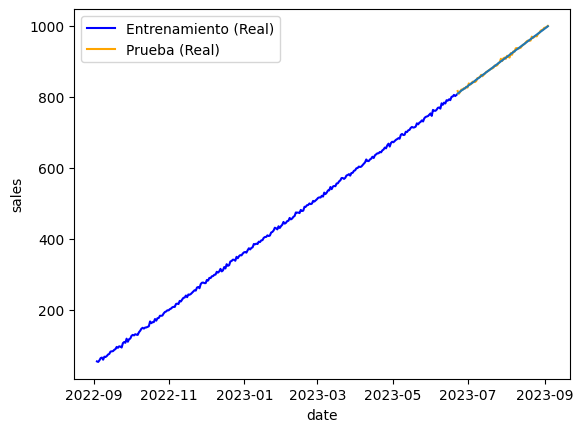

In [ ]:

sns.lineplot(train, label='Entrenamiento (Real)', color='blue')
sns.lineplot(test, label='Prueba (Real)', color='orange')
sns.lineplot(forecast_df, label='Predicción ARIMA', color='green', linestyle='--')

plt.title('Ventas Reales (Entrenamiento + Prueba) vs. Predicción ARIMA')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.legend()
plt.grid(True) # Para mejor visualización
plt.show()

# Explicación del resultado: 

 - La linea azul muestra  el 80% de los datos que ella tomo como referencia para aprender que las ventas van subiendo en linea recta.
 - La líneaa naranja que esta como gris nos muestra el 20% que es el como el futuro de como pueden ir las ventas. 

# Conclusión Final: 

- Ya Puedes planificar tu amacen . Tus ventas tienen una tendencia muy fuerte al alza. El modelo presenta un error del 2,73 lo que es muy bajo lo que confirma que el modelo es altamente preciso y confiable para proyectar tu nuevo almacén. 

# Guardar el Modelo 
 

In [ ]:
modelo_predictivo = "arima_proyecion_ventas"
dump(modelo_predictivo, open(modelo_predictivo, 'wb'))